* Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Or, alternatively, **Restart & Run All**.

* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

* You can always add additional cells to the notebook to experiment, to test your answers, or to provide additional support for your answers.

* You should not need to install new packages to complete an assignment. If you use any packages not available via the MATH405 `Project.toml` then your assignment will likely not be graded correctly.

* Submissions are only accepted via CANVAS!

* Late submissions: within 24h I will reduce the grade to 70%. I will not accept submissions after 24h. Please manage your time well and complete the assignments with plenty of buffer time.

* By entering your name below you confirm that you have completed this assignment on your own and without (direct) help from your colleagues. Plagiarism / copying will be checked by comparing assignments and by by testing understanding in workshops and the oral exam (final). I reserve the option to downgrade an assignment at any point.

In [1]:
NAME = "Owen Sheekey"

"Owen Sheekey"

---

# MATH 405/607 

# Numerical Methods for Differential Equations

## Assignment 1

This assignment contains a review of Taylor's theorem, a bit of floating point arithmetic and some elementary linear algebra and numerical linear algebra. It serves primarily as a warm-up and introduction to using Jupyter notebooks. To install Julia, Jupyter and to learn how to use the notebooks, please look at the `[WS1]` notebook.



* **Due date:** Tue 22 September 2020, 1200 noon
* 70 points (out of 85) will count at 100%

In [2]:
include("math405.jl")

 Activating environment at `~/Documents/UBC/Math/Math 405/math405_2020W/assignments/A1/Project.toml`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1278


### Question 1: [5+5]

(a) Let $f : \mathbb{R} \to \mathbb{R}$ be smooth (as often differentiable as needed). Write down the expression for the $n$th degree Taylor polynomial $T_n(x)$ expanded around $0$.

(b) Let $R_n(x)$ be the remainder, i.e. $f(x) = T_n(x) + R_n(x)$. Look up the Lagrange form of the remainder as well as the integral form of the remainder and write them down.

(a) $$ T_n(x) = \sum_{k=0}^{n}\frac{f^{(k)}(0) \, x^k}{k!} $$
(b) $$ R_n(x) = \frac{f^{(n+1)}(\xi)\,x^{n+1}}{(n+1)!} \quad\quad\quad R_n(x) = \int_0^x \frac{f^{(n+1)}(k) \, (x - k)^n}{n!}\,\, dk $$
With $\xi \in \rm I\!R$ and $0 < \xi < x$

### Question 2 [5+5]

(a) Consider the centered finite-difference formula 
$$
    \frac{f(x+h) - f(x-h)}{2h} \approx f'(x)
$$
Prove that it is second-order accurate by deriving a sharp error bound in terms of $h$ and $\|f^{(j)}\|_\infty$ where you should determine $j$. 

(b+) Construct a finite-difference approximation for the third derivative $f'''(x)$. 

(a) 
We know that

$$\begin{aligned} 
f(x + h) &= f(x) + hf'(x) + \frac{h^2f''(x)}{2} + \frac{h^3f'''(\xi^+)}{6} \\
f(x - h) &= f(x) - hf'(x) + \frac{h^2f''(x)}{2} - \frac{h^3f'''(\xi^+)}{6} \\
\end{aligned}$$
Therefore 
$$ f(x + h) - f(x - h) = 2h f'(x) + \frac{h^3}{6}\big(f'''(\xi^+) + f'''(\xi^-)\big)$$ 
Which of course implies
$$ \frac{f(x + h) - f(x - h)}{2h} = f'(x) + \frac{h^2}{12}\big(f'''(\xi^+) + f'''(\xi^-)\big)$$
We can easily upperbound the error ($\frac{h^2}{12}(f'''(\xi^+) + f'''(\xi^-))$ since $f'''(\xi^+) + f'''(\xi^-) \leq 2 \|f'''\|_\infty$. Therefore, we have a sharp error bound of 
$$ \frac{h^2}{6} \,\, \|f'''\|_\infty$$

(b)
We can approximate $f'''$ using the following finite difference scheme
$$ f'''(x) \approx \frac{3}{15h^3}\,\, \big(f(x+2h) - f(x-2h) - f(x+h) + f(x-h)\big) $$
We can show that this will work by setting up the four requisite series.
$$ \begin{align}
    f(x+2h) &= 
    -f(x-2h) &= \\
    -f(x+h) &= \\
    f(x-h) &= \\
    \text{SUM} &= 
   \end{align}
$$

### Question 3 [5+5+10]

Consider the function $f(x) = \exp(x)$, evaluated in floating point arithmetic. Suppose we wish to approximate its first derivative $f'(x) = \exp(x)$ by a finite difference. 

(a) For the forward difference, a floating point analysis yields 
$$
    {\rm fl}\Big[ \frac{f(x+h) - f(x)}{h} \Big] = f'(x) + O(h) + O(\epsilon h^{-1}).
$$
where $\epsilon$ is machine precision. Produce a figure or table that clearly demonstrates this behaviour. 

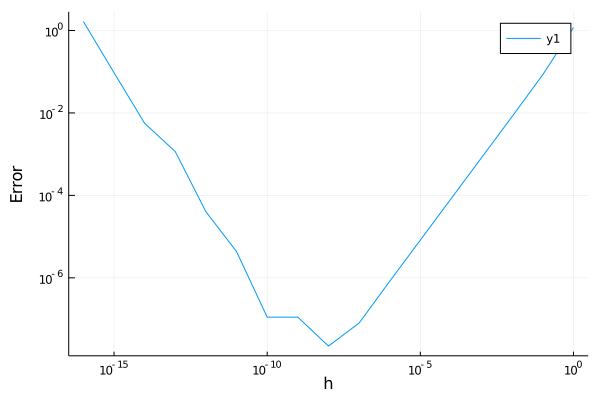

In [26]:
# Lets use x_0 = 0.5 to produce results that clearly illustrate this point.
x0 = 0.5

# Using an array of powers of 10 as the h's
hpows = range(-16,0,length = 17)
h = 10 .^ hpows

# Calculate the results from approximation and the expected results, compare
forwarddiff = (exp.(x0 .+ h) .- exp(x0)) ./ h
realval = exp(x0)
abserror = abs.(forwarddiff .- realval)

# Plot all this up on a nice log log plot 
plot(h,abserror, xaxis=:log, yaxis=:log)
xlabel!("h")
ylabel!("Error")

This shows the behaviour desired fairly well I think. Clearly, there is a step size for which decreasing the step size starts making our error _worse_. This is well predicted by the error $O(h)+O(h^{-1} \epsilon)$ since it represents the point where the $\epsilon$ term begins dominating.

Question 3 continued ...

(b) For `Float64` precision $\epsilon \approx 10^{-16}$ (cf. `eps(Float64)`) How would you choose $h$? How would you choose $h$ for `Float32` precision?

(c+) What is the corresponding estimate for the centered difference from Q2a and how does it affect your choice of $h$?

(b) We simply want to make sure that the two error terms are about the same in magnitude. So if we know that $\epsilon \approx 10^{-16}$ then we should pick $h \approx 10^{-8}$ (also note thats the lowest error on the above plot from part (a)) such that 
$$ h = h^{-1}\epsilon \implies h^2 = \epsilon $$
In `Float32` precision, we know that $\epsilon$ should be on the order 

(c) For centered finite difference, our two error terms are $O(h^2) + O(h^{-1}\epsilon)$, therefore
$$ h^2 = h^{-1}\epsilon \implies h^{3} = \epsilon $$
So we should choose $h = \sqrt[3]{\epsilon}$. We can also just do the plot from (a) and see this behavior!

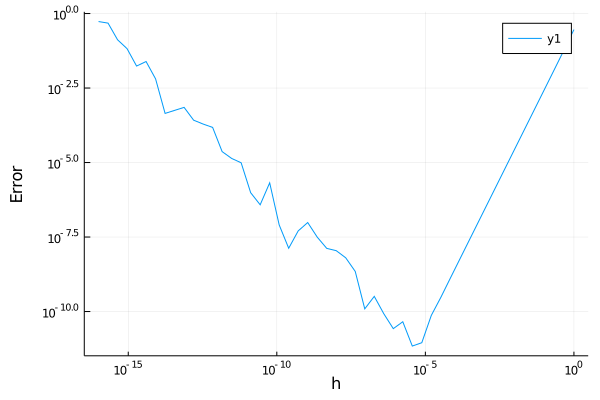

In [29]:
# Lets use x_0 = 0.5 to produce results that clearly illustrate this point.
x0 = 0.5

# Using an array of powers of 10 as the h's
# Choose a few more to show centered difference better
hpows = range(-16,0,length = (17*3))
h = 10 .^ hpows

# Calculate the results from approximation and the expected results, compare
# This time with centered finite difference
forwarddiff = (exp.(x0 .+ h) .- exp.(x0 .- h)) ./ (2 .* h)
realval = exp(x0)
abserror = abs.(forwarddiff .- realval)

# Plot all this up on a nice log log plot 
plot(h,abserror, xaxis=:log, yaxis=:log)
xlabel!("h")
ylabel!("Error")

As expected, choose $h = \sqrt[3]{\epsilon} = 10^{-5.33}$

In all subsequent questions: $\mathbb{F} \in \{ \mathbb{R}, \mathbb{C}\}$.

### Question 4 [5]

If $A, B \in \mathbb{F}^{N \times N}$ are invertible then $C = AB$ is also invertible and $C^{-1} = B^{-1} A^{-1}$. Check this result numerically, by testing the identity for randomly chosen matrices. As an exception you may use the `inv` command.

In [ ]:
# YOUR CODE HERE

### Question 5 [5+5+10]

(a) Construct a right-hand side $b$ such that the system 
$$ 
   A x = b, \qquad \text{where} \quad 
   A = \begin{pmatrix}
       2 & 1 & 0 & 2 \\ 
       3 & 1 & 1 & 4 \\ 
       4 & 1 & 2 & 6 \\ 
       5 & 1 & 3 & 8 
   \end{pmatrix}
$$
has no solution. In the solution cell enter this right-hand side as 
```julia 
b = [ # insert elements
```

(b) For $b = 0$ compute the set of all solutions to the system in (a) (i.e. the null-space of the system matrix). In the solution cell, enter your solution as a matrix
```julia 
N = # enter the definition of the null space 
```
such that the columns `N[:, i]` span the space of all solutions.

(c+) For the system that you derived in (a) which has no solution, find the "regularised least squares solution" i.e. 
$$
    x = \arg\min \| A x - b \|^2 + \|x\|^2
$$
In the solution cell, enter this solution as 
```julia 
x = # enter the definition of the solution   
```

In [ ]:
A = [ 2 1 0 2
      3 1 1 4
      4 1 2 6
      5 1 3 8 ]

# YOUR CODE HERE

### Question 6 [5+5]

Find out how to use Julia's LU factorisation `lu` with *AND WITHOUT* partial pivoting, and find out how to compute the condition number of a matrix.

The codes `system1()` and `system2()` below will produce two linear systems.  Solve them with and without pivoting and comment on your observations. How is the result related to the condition numbers?

(5 points for code + 5 points for discussion)

In [ ]:
Random.seed!(3)

system1() = randn(500, 500), randn(500)

function system2()
    A = randn(500,500)
    for n = 1:500
        A[n,n] *= 1e-12
    end 
    b = randn(500)
    return A, b 
end

# YOUR CODE HERE

YOUR ANSWER HERE

### Question 7 [5+10]

The *entropy* (measure of disorder / randomness) for a multivariate Gaussian distribution with covariance $\Sigma$ is given by 
$$
    S = \log\det\Sigma
$$
In this question we will come up with an efficient and numerically stable algorithm to compute this.

(a+) Observe the result of the following naive simulation and in the cell below explain what you have observed, relating it to properties of `Float64` floating point arithmetic.



In [ ]:
Random.seed!(0)
for N in (2).^(4:10)
    A = randn(N, N)  # random matrix
    A = A * A'       # symmetric and positive definite 
    @show log(det(A))
end    

In [ ]:
# use this cell to experiment


YOUR ANSWER HERE

Question 7 continued ... 

(b+) Devise an algorithm to evaluate $\log \det A$ when $A$ is symmetric and positive definite, which does not suffer from the problem in part (a).

In [ ]:
function mylogdet(A)
# YOUR CODE HERE
end

When you have completed all tasks, please click on `[Kernel]` and then `[Restart & Run All]` to make sure that your answers reproduce correctly when running from a clean notebook with no hidden variables left over from editing. Once you have convinced yourself that it is all in order, please download and submit the notebook to CANVAS.